In [1]:
from tensorflow.keras.datasets import imdb

In [2]:
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500) #전체 데이터 셋에서 자주 등장하는 상위 500개 단어

/Users/simsanghyeog/opt/anaconda3/envs/tfconda/lib/python3.7/site-packages/tensorflow_core/python/keras/datasets/imdb.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/simsanghyeog/opt/anaconda3/envs/tfconda/lib/python3.7/site-packages/tensorflow_core/python/keras/datasets/imdb.py:130: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
print(train_input.shape, test_input.shape) #일차원으로 표시되지만 넘파이 배열 안에 파이썬 리스트로 있다.

(25000,) (25000,)


In [4]:
print(len(train_input[0]))
print(len(train_input[1]))

218
189


In [5]:
print(train_input[0]) #첫번째 리뷰 데이터

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [6]:
print(train_target[:20])  #긍정 or 부정 이진분류

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [7]:
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [8]:
import numpy as np
lengths = np.array([len(x) for x in train_input])
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


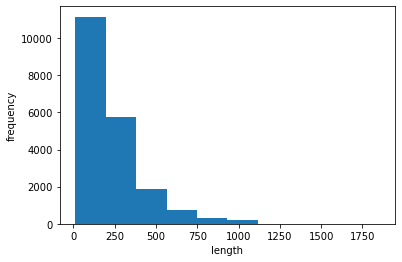

In [9]:
import matplotlib.pyplot as plt

plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()  #리뷰 길이가 서로 다르다. 리뷰의 길이를 통일하자

In [10]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)  #100개의 토큰만 사용. 100개보다 적으면 zero패딩, 많으면 나머지 토큰 삭제
#pad_sequences() 함수는 기본적으로 maxlen보다 긴 시퀸스의 앞부분 자름. 뒤를 자르려면 truncating='post'해야함. 기본('pre')

In [11]:
print(train_seq.shape)

(20000, 100)


In [12]:
print(train_seq[0])  #100개보다 많은 토큰 삭제된것(앞부분)

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [13]:
print(train_input[0][-10:]) #뒷부분은 있다

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [14]:
print(train_seq[5]) #100개보다 적은 토큰 zero 패딩

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [15]:
val_seq = pad_sequences(val_input, maxlen=100) #검증데이터도

In [16]:
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.SimpleRNN(8, input_shape=(100,500))) #SimpleRNN 클래스의 activation 매개변수 기본값은 'tanh'
#RNN에서는 이전값을 반복하여 누적 재사용함으로 relu를 사용하면 값이 계속 증폭될 수 있기 때문에 tanh가 더 좋다.
model.add(keras.layers.Dense(1, activation='sigmoid'))

2022-08-19 14:29:03.673144: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-19 14:29:03.673884: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 10. Tune using inter_op_parallelism_threads for best performance.


In [17]:
train_oh = keras.utils.to_categorical(train_seq) #원핫 인코딩 수행
print(train_oh.shape)

(20000, 100, 500)


In [18]:
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [19]:
print(train_oh[0][0][:12]) #10번째

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [20]:
print(np.sum(train_oh[0][0])) #전체 비트 중 1은 하나

1.0


In [21]:
val_oh = keras.utils.to_categorical(val_seq) #검증데이터도 원핫 인코딩

In [22]:
model.summary()    #500*8 + 8*8 + 8(바이어스) = 4072

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 8)                 4072      
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [23]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(train_oh, train_target, epochs=100, batch_size=64, validation_data=(val_oh, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Train on 20000 samples, validate on 5000 samples
Epoch 1/100
20000/20000 [==============================] - 32s 2ms/sample - loss: 0.6952 - accuracy: 0.5210 - val_loss: 0.6880 - val_accuracy: 0.5428
Epoch 2/100
20000/20000 [==============================] - 28s 1ms/sample - loss: 0.6838 - accuracy: 0.5637 - val_loss: 0.6799 - val_accuracy: 0.5748
Epoch 3/100
20000/20000 [==============================] - 28s 1ms/sample - loss: 0.6731 - accuracy: 0.6016 - val_loss: 0.6678 - val_accuracy: 0.6104
Epoch 4/100
20000/20000 [==============================] - 28s 1ms/sample - loss: 0.6599 - accuracy: 0.6363 - val_loss: 0.6553 - val_accuracy: 0.6376
Epoch 5/100
20000/20000 [==============================] - 33s 2ms/sample - loss: 0.6457 - accuracy: 0.6638 - val_loss: 0.6423 - val_accuracy: 0.6580
Epoch 6/100
20000/20000 [==============================] - 31s 2ms/sample - loss: 0.6303 - accuracy: 0.6888 - val_loss: 0.6266 - val_accuracy: 0.6898
Epoch 7/100
20000/20000 [==========================

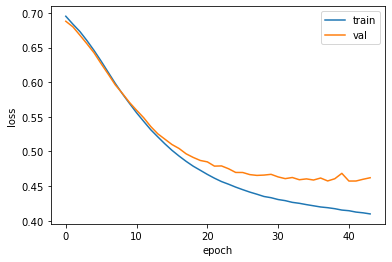

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
#500개 중에 하나를 나타내기 위해 원핫인코딩 쓰는것은 비효율적->워드 임베딩
#학습하여 의미있는 값으로 자동으로 채워준다.
model2 = keras.Sequential()
#원핫 인코딩안하고
model2.add(keras.layers.Embedding(500, 16, input_length=100)) #워드 임베딩 - 100개의 입력 중 500개 종류를 16개의 벡터크기로
model2.add(keras.layers.SimpleRNN(8, dropout=0.3)) #dropout적용. (SimpleRNN도 동일)
model2.add(keras.layers.Dense(1, activation='sigmoid'))

model2.summary()

# Long Short Term Memory (LSTM)
##### 기본 RNN은 시퀀스 길이가 길 경우 성능이 저하되는 문제가 있다. 타임스텝이 길어질수록 이전 입력정보 사라짐
### 이를 해결하기위해 개발된 순환신경망 LSTM
### 최근 가장 많이 사용되고 있는 RNN 모델이라 할 수 있음

In [ ]:
#SimpleRNN대신 LSTM사용
model = keras.Sequential()

model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8, dropout=0.3))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

In [ ]:
#2개의 층을 연결하기
model3 = keras.Sequential()

model3.add(keras.layers.Embedding(500,16,input_length=100))
model3.add(keras.layers.LSTM(8,dropout=0.3, return_sequences=True)) #마지막이 아닌 층에 retrun_sequences에 True를 준다.
model3.add(keras.layers.LSTM(8,dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

model3.summary()